### Bonjour, on se propose dans ce Notebook de faire une analyse descriptive d'un jeu de données relatives à des patients qui sont malades de *bactérémie*, ou bien sont en bonne santé. ###
Le bactérémie est l'état dans lequel un pathogène a gagné le sang, c'est très dangereux, ça peut être fatal. 
Les variables qu'on a pour les patients sont différentes mesures effectuées à partir d'**examens du sang**. 



données dispo ici : https://zenodo.org/records/7554815#.ZF-dztLMK-Y

In [1]:
import pandas as pd
import numpy as np
import random
from random import sample

In [2]:
table = pd.read_csv("/home/zuko/Téléchargements/Bacteremia_public_S2.csv", index_col='ID')
table[:5].T

ID,1,3,5,7,9
SEX,2,1,1,1,2
AGE,62,72,46,84,38
MCV,99.3,85.1,96.3,91.3,85.1
HGB,11.5,10.3,7.4,10.3,13.7
HCT,35.9,34.7,22.8,31.1,38.7
PLT,307.0,182.0,64.0,309.0,183.0
MCH,31.5,26.0,31.2,30.4,30.2
MCHC,31.8,30.6,32.4,33.3,35.3
RDW,19.5,15.0,19.7,13.8,12.6
MPV,10.8,9.7,11.1,8.5,10.0


In [3]:
table.sort_index(inplace=True) #améliore la perf et permet gérer eventuelles erreurs si des ind dupliqués

In [4]:
table.map(lambda x  : pd.isna(x)).sum(axis=1)

ID
1         0
3        10
5         4
7         0
9         2
         ..
62436     4
62438    14
62446     4
62454     0
62455     0
Length: 14691, dtype: int64

In [5]:
table.shape # on a > 14000 ind! 

(14691, 52)

In [ ]:
# on pourrait elaguer les colonnes ayant vraiment trop de NAN?
#table.drop(columns = [col for col in table.columns if table[col].isnull().sum() > 3000], inplace = True)

In [6]:
# quelles colonnes ont bcp de nan?
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 200)
#%timeit list(l)
list(l)[:3]

[('MPV', 702), ('LYM', 262), ('MONO', 246)]

In [7]:
l = ((col, table[col].isnull().sum()) for col in table.columns if table[col].isnull().sum() > 700)
list(l) #colonnes enormement de nan

[('MPV', 702),
 ('NT', 2467),
 ('APTT', 2549),
 ('FIB', 2567),
 ('SODIUM', 1282),
 ('POTASS', 2008),
 ('CA', 1276),
 ('PHOS', 1242),
 ('MG', 1869),
 ('HS', 3061),
 ('GBIL', 1441),
 ('TP', 1583),
 ('ALB', 1676),
 ('AMY', 3913),
 ('PAMY', 7114),
 ('LIP', 3699),
 ('CHE', 2447),
 ('AP', 1400),
 ('ASAT', 1154),
 ('ALAT', 987),
 ('GGT', 1262),
 ('LDH', 1714),
 ('CK', 2080),
 ('GLU', 4192),
 ('TRIG', 5061),
 ('CHOL', 5045),
 ('BASOR', 732),
 ('EOSR', 732),
 ('LYMR', 732),
 ('MONOR', 732),
 ('NEU', 728),
 ('NEUR', 732),
 ('PDW', 1102)]

In [8]:
def compteur_nan(df):
    for ind in df.index:
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 0: #compter lignes sans NAN
            yield ind #on veut examiner nombres nan par index

In [9]:
print(f"{len(list(compteur_nan(table)))} lignes len(NAN) > 0") 
list(compteur_nan(table))[:10]

10712 lignes len(NAN) > 0


[3, 5, 9, 11, 12, 13, 25, 26, 27, 28]

In [10]:
def nan_lignes(df):
    for ind in df.index: #The index (row labels) of the DataFrame. (from documentation)
        nan_val = 0
        for value in df.loc[ind] :
            if pd.isna(value) == True:
                nan_val += 1
        if nan_val > 5: #compter lignes avec NAN
            yield ind#(ind, nan_val)

In [11]:
table.drop(index = [ind for ind in nan_lignes(table)], inplace = True)
#test que ca a marché
print(f"{len(list(nan_lignes(table)))} lignes avec plus de 5 NAN") 

0 lignes avec plus de 5 NAN


In [12]:
#long = len(list(compteur_nan(table))) # len de liste lignes ayant 0 >= NAN > 6
k = 3 #on tire k individu
choice = random.sample(list(compteur_nan(table)), k) #on tire k ind au hasard parmi nos individus qui ondes NAN mais < 6
print(f"on tire {choice} ind parmi ind qui ont des NAN<6, la liste fait {len(list(compteur_nan(table)))} lignes")
res = table.loc[choice].T
res

on tire [53327, 16519, 1260] ind parmi ind qui ont des NAN<6, la liste fait 6124 lignes


ID,53327,16519,1260
SEX,2,1,1
AGE,48,60,65
MCV,90.1,86.1,89.4
HGB,10.0,13.5,14.2
HCT,29.7,37.5,40.9
PLT,167.0,179.0,335.0
MCH,30.3,31.1,31.3
MCHC,33.6,36.0,34.8
RDW,14.6,12.7,12.5
MPV,10.0,9.4,10.9


In [13]:
def affecter_nan(df):
    for col in df.columns:
        if table[col].isnull().sum() > 0:
            for ind, val in enumerate(table[col]): #ind ici est rang dans series
                if pd.isna(val) == True:
                    table.loc[table.index[ind], col] = table[col].mean()

In [14]:
#%timeit 
affecter_nan(table)

In [15]:
len(list(compteur_nan(table))) #test s'il reste des lignes qui ont des Nan

0

In [ ]:
#X = np.linspace(0., 10., 50) array plus rapide que listes, linspace : creer array avec (borne, borne incluse, nb de pts)
#out_data = (une_fonction(x) for x in in_data)

En fait en numpy on passe son temps à écrire des expressions dont les éléments sont des tableaux, et cela produit des opérations membre à membre, comme on vient de le voir avec cosinus.

In [ ]:
# l'énorme majorité du temps, on écrit avec numpy
# des expressions qui impliquent des tableaux
# exactement comme si c'était des nombres

In [ ]:
#np.all(a == b) vérifier que tous les éléments du tableau sont vrais

on utilise plutôt les tableaux logiques comme des masques, pour faire ou non des opérations sur un autre tableau

In [16]:
l_rates = [i for i in table.columns if i[-1] == 'R'] #si colonne finit par R on recupère
for i in l_rates: 
    if i[:-1] not in table.columns:
       print(f"{i} n'a pas de correspondant brut") 
    else:
        print(f"{i} possede un correspondant")

BASOR possede un correspondant
EOSR possede un correspondant
LYMR possede un correspondant
MONOR possede un correspondant
NEUR possede un correspondant


In [17]:
table = table.drop(columns = l_rates)

In [ ]:
table.groupby('BloodCulture', observed=True).mean(numeric_only=True).T[:7]

In [ ]:
#table.loc[:, 'globules'].mean()
#lignes = table.loc[:, 'sex'] == 'M'
#table.loc[lignes, 'globules'].mean()

In [ ]:
# quels sont les taux de lymphocytes selon malade/ sain et selon sexe? (1=male)
table.pivot_table('LYM',
                  aggfunc = 'mean',
                  index = 'BloodCulture',
                  columns = 'SEX'
                 )

In [18]:
table.shape

(10103, 47)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_df = table.copy().drop(columns = ['AGE', 'SEX', 'BloodCulture'])
data = pca_df.values
scaler = StandardScaler()
scaled_data = scaler.fit(data)
scaled_data = scaler.transform(data)
pca = PCA()
pca_res = pca.fit(scaled_data) #resultats de ACP

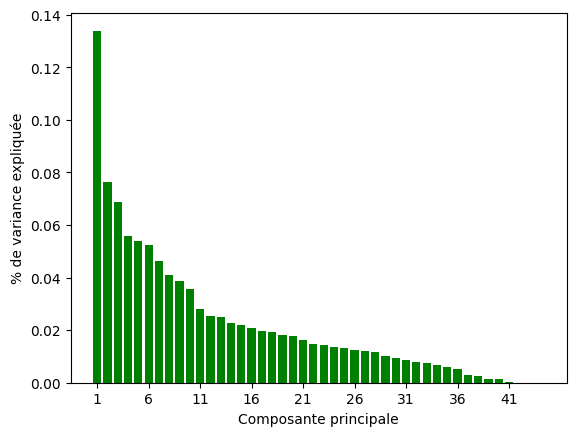

In [20]:
import matplotlib.pyplot as plt
ratios = pca.explained_variance_ratio_#[:25]

plt.bar(np.arange(1,len(ratios)+1), ratios, color='green')
plt.xticks(np.arange(1,len(ratios)+1, 5), np.arange(1, len(ratios)+1, 5))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

critère de Kayser : interpréter seulement axes dont lambda >= 1 = variance d'une seule var du jeu données initial

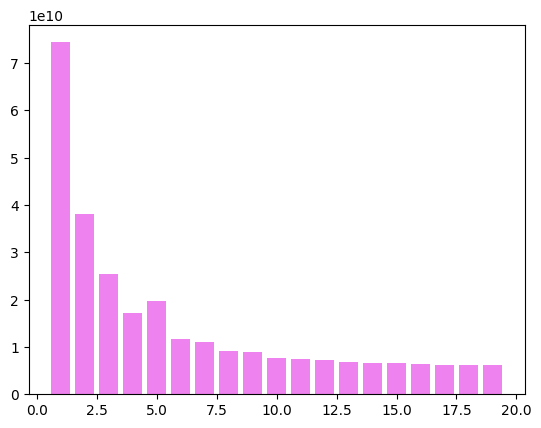

In [21]:
from sklearn.cluster import KMeans

array = []
for i in range(1,20):
    kmeans_i = KMeans(n_clusters=i, n_init=1, init='random').fit(data)
    inertie = kmeans_i.inertia_
    array.append(inertie)
plt.bar(range(1,20), array, color='violet')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++').fit(data)
pred = kmeans.predict(data)

In [23]:
pca_res.transform(scaled_data).shape

(10103, 44)

/tmp/ipykernel_318577/1001337182.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table.loc[:,'BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})


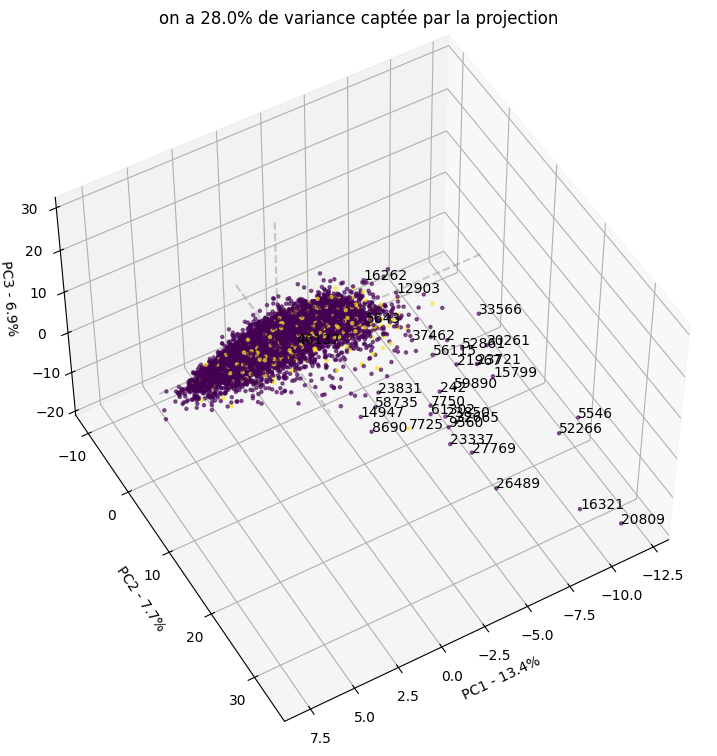

In [24]:
liste_out = [] #on fait une liste pour les outliers
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=50, azim=60)
comp = pca_res.transform(scaled_data)
# La couleur des points dépend de leur étiquette 
ax.plot(np.arange(-12, 7.7),0, 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0,np.arange(-10, 13), 0, linestyle='dashed', c='grey', alpha=0.4)
ax.plot(0, 0, np.arange(-5, 30), linestyle='dashed', c='grey', alpha=0.4)

ax.scatter(comp[:,0], comp[:,1], comp[:,2], c=table.loc[:,'BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, comp.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(comp[i,:3]) > 12:
        ax.text(comp[i,0], comp[i,1], comp[i,2], s=pca_df.index[i])
        liste_out.append(pca_df.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[:3])*100)}% de variance captée par la projection")
plt.show()

In [ ]:
#pca.components_.shape#, comp.shape

/tmp/ipykernel_318577/937138396.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax.scatter(comp[:,3], comp[:,4], comp[:,5], c=table.loc[:,'BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})


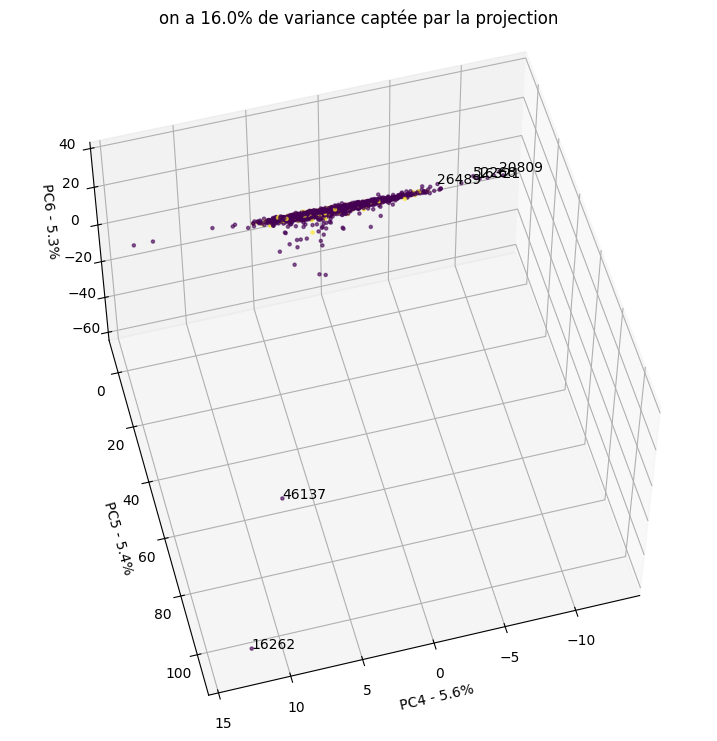

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=55, azim=75)
#comp = pca_res.transform(scaled_data)
# La couleur des points dépend de leur étiquette 
ax.scatter(comp[:,3], comp[:,4], comp[:,5], c=table.loc[:,'BloodCulture'].replace({'yes':1, 'no':0}), marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})
ax.set_xlabel(f"PC4 - {100*pca_res.explained_variance_ratio_[3]:.1f}%")
ax.set_ylabel(f"PC5 - {100*pca_res.explained_variance_ratio_[4]:.1f}%")
ax.set_zlabel(f"PC6 - {100*pca_res.explained_variance_ratio_[5]:.1f}%")
for i in np.arange(0, comp.shape[0]): 
    if np.linalg.norm(comp[i,3:6]) > 25:
        #this part is based on a stackoverflow discussion
        ax.text(comp[i,3], comp[i,4], comp[i,5], s=pca_df.index[i])
ax.set_title(f"on a {np.round(np.sum(pca_res.explained_variance_ratio_[3:6])*100)}% de variance captée par la projection")

plt.show()

In [26]:
def moyenne_agg(df):
    moyennes = [df[i].mean() for i in df.columns[:-1]]
    if len(moyennes)+1 == len(df.columns):
        nouvelle_ligne = moyennes+['maybe']
        s = pd.Series(dict(zip(df.columns, nouvelle_ligne)))
        return s

In [27]:
out = pd.concat(
    [moyenne_agg(table).to_frame(name='mean').T,
     moyenne_agg(table.loc[liste_out].copy()).to_frame(name='mean_out').T]
).T

In [43]:
moyennes = [table[i].mean() for i in table.columns[:-1]]#exclue variable quali
if len(moyennes)+1 == len(table.columns):
    nouvelle_ligne = moyennes+['maybe']
    s = pd.Series(dict(zip(table.columns, nouvelle_ligne)))
pd.concat([table.loc[liste_out], s.to_frame().T])#.shape

,SEX,AGE,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,...,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC,WBC,BloodCulture
242,2,64,92.7,11.0,36.0,190.0,28.4,30.9,17.0,11.0,...,85.0,130.0,102.0,94.0,11.79,15.8,13.8,4.0,17.41,no
5546,2,61,88.4,8.1,22.9,190.0,31.7,35.9,17.6,12.6,...,293.0,193.0,160.0,150.0,5.26,33.3,17.3,2.7,40.33,no
5643,2,55,100.7,10.2,30.8,611.0,33.5,33.1,14.7,9.8,...,16.0,156.0,234.0,148.0,24.46,83.8,10.8,3.0,89.65,no
7725,1,23,87.1,15.1,45.3,196.0,29.2,33.4,12.7,11.3,...,83880.0,152.0,109.0,117.0,21.21,14.9,13.9,5.4,18.41,yes
7750,2,64,98.5,13.2,43.6,43.0,30.4,30.8,15.2,11.6,...,1989.0,94.0,94.0,84.0,9.13,1.9,18.4,4.3,2.65,no
8690,1,35,85.2,13.4,38.4,78.0,29.2,34.8,12.8,9.4,...,14133.0,107.0,139.997384,150.932342,0.56,10.7,9.7,4.6,11.56,no
9560,1,41,93.5,11.1,33.1,60.0,31.6,33.7,14.8,10.2,...,1259.0,105.0,139.997384,150.932342,0.15,12.6,12.0,3.7,12.82,no
12903,2,25,95.0,5.2,15.9,708.0,30.5,32.0,22.9,10.9,...,46.0,102.0,138.0,102.0,32.75,52.4,11.5,1.8,64.32,no
14947,1,64,96.6,16.3,47.9,95.0,32.5,33.9,17.2,11.2,...,802.0,71.0,132.0,150.932342,2.04,15.9,16.2,5.0,18.1,no
15799,1,47,87.5,10.3,30.3,123.0,29.9,34.4,14.3,11.6,...,59759.0,170.0,141.0,53.0,14.31,8.5,14.7,3.4,10.25,no


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')
# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
# Make the dendrogram
dendrogram(Z, labels=table.index, leaf_rotation=90)
# Show the graph
plt.show()

In [44]:
# ndarray of shape (n_components, n_features)
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
Loadings = pd.DataFrame(pca.components_,columns=pca_df.columns,index=PCnames)

Loadings.iloc[:3]

,MCV,HGB,HCT,PLT,MCH,MCHC,RDW,MPV,LYM,MONO,...,LDH,CK,GLU,TRIG,CHOL,CRP,NEU,PDW,RBC,WBC
PC1,-0.054809,0.328605,0.322036,0.049018,0.002855,0.101540,-0.217647,-0.057893,0.034467,-0.049344,...,-0.089147,-0.038732,-0.009841,-0.026872,0.201551,-0.160592,-0.079252,-0.045429,0.320830,-0.068624
PC2,0.072717,0.207693,0.220049,-0.010565,0.059266,-0.002196,-0.014397,0.203206,0.116744,0.197002,...,0.285326,0.140377,0.107611,0.059978,0.036648,0.032414,0.249634,0.214562,0.180369,0.272228
PC3,-0.228943,-0.070085,-0.026380,0.383479,-0.303382,-0.226305,0.085291,-0.218658,0.104924,0.258857,...,-0.124667,-0.072330,0.043574,0.014356,0.028502,0.186786,0.314598,-0.195930,0.058596,0.336284


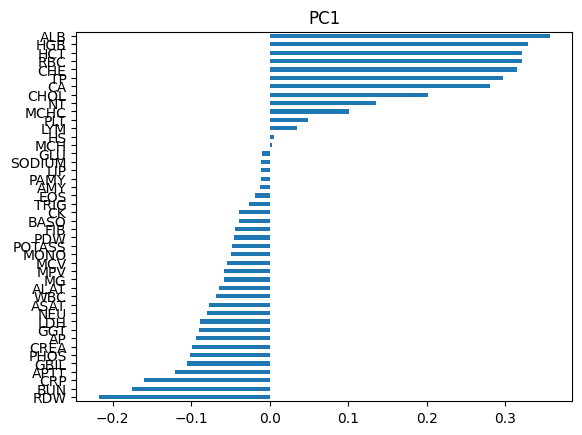

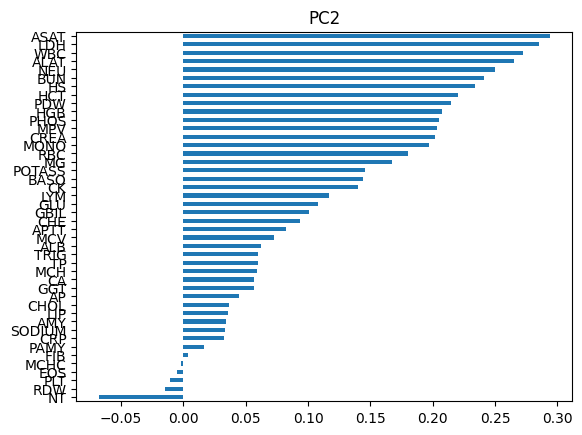

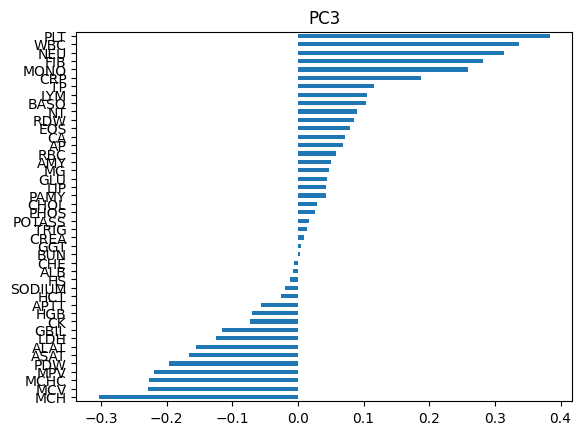

In [45]:
for i in Loadings.index[:3]:
    Loadings.loc[f"{i}"].sort_values().plot.barh()
    plt.title(f"{i}")
    plt.show()

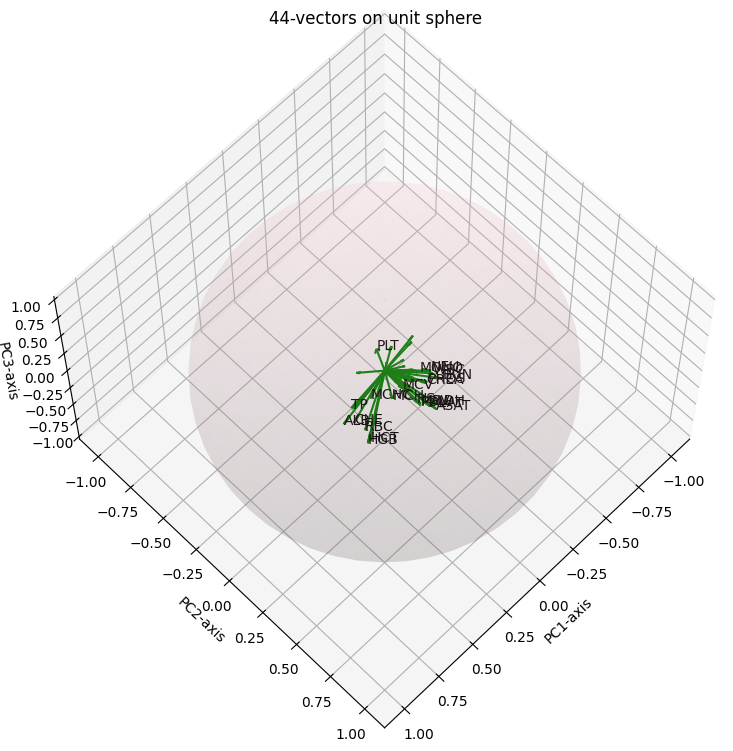

In [46]:
#sphere des correlations
fig = plt.figure(figsize=(9, 12))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d', elev=65, azim=45)
# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="pink", alpha=0.1)


# a random array of 3D coordinates in [-1,1]

coef = np.transpose(pca.components_)
# tails of the arrows
tails= np.zeros(len(coef[1]))

#ax.scatter(coef[0,:], coef[1,:], coef[2,:], color='g', marker='.')
# heads of the arrows with adjusted arrow head length
ax.quiver(tails,tails,tails,coef[:,0], coef[:,1], coef[:,2], color='g', arrow_length_ratio=0.15)

ax.set_xlabel('PC1-axis')
ax.set_ylabel('PC2-axis')
ax.set_zlabel('PC3-axis')

for i in np.arange(0, coef.shape[0]): #i is num of PCi 
    if np.linalg.norm(coef[i,:4]) > 0.3:
        ax.text(coef[i,0], coef[i,1], coef[i,2], s=pca_df.columns[i])
ax.set_title(f'{len(coef)}-vectors on unit sphere')

plt.show()

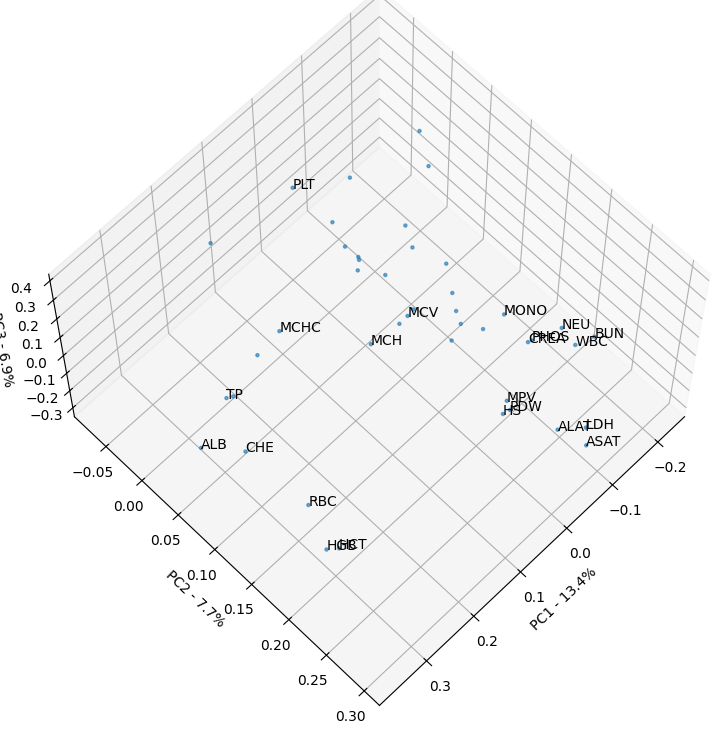

In [47]:
liste_ini = []
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d', elev=65, azim=45)
#tr = p.transform(scaled_data)
# La couleur des points dépend de


ax.scatter(coef[:,0], coef[:,1], coef[:,2], marker=".", alpha=0.6)#c=table['BloodCulture'].replace({'yes':1, 'no':0})

ax.set_xlabel(f"PC1 - {100*pca_res.explained_variance_ratio_[0]:.1f}%")
ax.set_ylabel(f"PC2 - {100*pca_res.explained_variance_ratio_[1]:.1f}%")
ax.set_zlabel(f"PC3 - {100*pca_res.explained_variance_ratio_[2]:.1f}%")
for i in np.arange(0, coef.shape[0]): #this part is based on a stackoverflow discussion
    if np.linalg.norm(coef[i,:4]) > .3:
        ax.text(coef[i,0], coef[i,1], coef[i,2], s=pca_df.columns[i])
        liste_ini.append(pca_df.columns[i])
plt.show()

In [ ]:
coef.shape

In [ ]:
#pc_infos[:3]#.shape#["PC-0"])

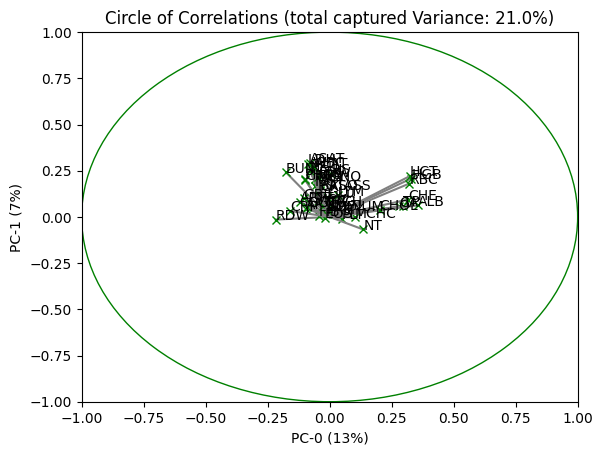

In [48]:
#df_norm = (df - df.mean()) / df.std()
# PCA
#pca = PCA(n_components='mle')

ebouli = pd.Series(pca.explained_variance_ratio_)
	
# Circle of correlations
# http://stackoverflow.com/a/22996786/1565438

cols = ['PC-'+str(x) for x in range(len(ebouli))]
pc_infos = pd.DataFrame(coef, columns=cols, index=pca_df.columns)

#def circleOfCorrelations(pc_infos, ebouli):
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle1)
for idx in range(pc_infos.shape[0]):
	x = pc_infos.loc[pc_infos.index[idx],"PC-0"]
	y = pc_infos.loc[pc_infos.index[idx],"PC-1"]
	plt.plot([0.0,x],[0.0,y],'-', c='grey')
	plt.plot(x, y, 'x', c='g')
	plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title(f"Circle of Correlations (total captured Variance: {np.round(np.sum(ebouli[:2])*100)}%)");

In [53]:
#itère dans les variables
var_interet = ((pca_df.columns[rank], np.linalg.norm(i[:4])) for rank, i in enumerate(np.transpose(pca.components_)) if np.linalg.norm(i[:4]) > .2)
#len(list(variables_i))
liste_one = []
liste_two = []
for i, j in list(var_interet):
    liste_one.append(i)
    liste_two.append(j)
pd.Series(liste_two, index=liste_one).sort_values(ascending= False)

WBC       0.525483
NEU       0.490471
MCH       0.474960
MONO      0.427799
HGB       0.409103
HCT       0.395156
PLT       0.387072
BUN       0.381012
MCV       0.377637
RBC       0.376013
ALB       0.369490
CREA      0.361709
ASAT      0.359081
MCHC      0.350035
MPV       0.338213
LDH       0.338035
TP        0.335172
CHE       0.335070
PHOS      0.332664
HS        0.327346
ALAT      0.326022
PDW       0.313745
CA        0.296787
RDW       0.294929
FIB       0.292538
CRP       0.283935
POTASS    0.243797
CHOL      0.228428
NT        0.205137
GBIL      0.203965
MG        0.200339
dtype: float64

In [56]:
liste_index = pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:20].index

In [ ]:
liste_index = pd.Series(liste_two, index=liste_one).sort_values(ascending= False)[:20].index
#pca_df = table.loc[index_2, liste_index]
#pca_df = table.loc[:, liste_index].copy() # raffinage des variables